In [1]:
import os
import pandas as pd
import scipy
import scanpy as sc
from multimeasure import MultiAnnData

**Option 1** Read the data from .txt files (Remember to change files path according to your set-up)

In [2]:
file_dir = "/project/shefflab/bdshack19/sciCAR/rawdata/GSE117089_RAW"

RNA_matrix = os.path.join(file_dir, "GSM3271040_RNA_sciCAR_A549_gene_count.txt.gz")
RNA_cell = os.path.join(file_dir, "GSM3271040_RNA_sciCAR_A549_cell.txt.gz") #obs
RNA_gene = os.path.join(file_dir, "GSM3271040_RNA_sciCAR_A549_gene.txt.gz") #var

ATAC_matrix = os.path.join(file_dir, "GSM3271041_ATAC_sciCAR_A549_peak_count.txt.gz")
ATAC_cell = os.path.join(file_dir, "GSM3271041_ATAC_sciCAR_A549_cell.txt.gz") #obs
ATAC_peak = os.path.join(file_dir, "GSM3271041_ATAC_sciCAR_A549_peak.txt.gz") #var

m = MultiAnnData()
m.add_modality("RNA", RNA_matrix, file_obs=RNA_cell, file_var=RNA_gene,
               obs_index = 'sample', var_index = 'gene_id', transpose_x=True)
m.measures

AnnData expects string indices for some functionality, but your first two indices are: RangeIndex(start=0, stop=2, step=1). 
AnnData expects string indices for some functionality, but your first two indices are: RangeIndex(start=0, stop=2, step=1). 


Modality RNA added.


{'RNA': AnnData object with n_obs × n_vars = 6093 × 113153 
     obs: 'sample', 'cell_name', 'experiment', 'treatment_time'
     var: 'gene_id', 'gene_type', 'gene_short_name'}

In [3]:
m.add_modality("ATAC", ATAC_matrix, file_obs=ATAC_cell, file_var=ATAC_peak, transpose_x=True)
m.measures

/home/glm5uh/.conda/envs/bdshack2019/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
AnnData expects string indices for some functionality, but your first two indices are: RangeIndex(start=0, stop=2, step=1). 
AnnData expects string indices for some functionality, but your first two indices are: RangeIndex(start=0, stop=2, step=1). 


Modality ATAC added.


{'RNA': AnnData object with n_obs × n_vars = 6093 × 113153 
     obs: 'sample', 'cell_name', 'experiment', 'treatment_time'
     var: 'gene_id', 'gene_type', 'gene_short_name',
 'ATAC': AnnData object with n_obs × n_vars = 6085 × 189603 
     obs: 'sample', 'source', 'group', 'experiment'
     var: 'id', 'peak', 'chr', 'start', 'end'}

In [4]:
#if you need just AnnData try extracting it like this:
rna = m.measures["RNA"]
atac = m.measures["ATAC"]

**Option 2** If you want to read data from .h5ad files # much quicker! :)

In [ ]:
file_dir = "../.."

RNA_obj = os.path.join(file_dir, "sciCAR_mouse_rna_scanpy.h5ad")
ATAC_obj = os.path.join(file_dir, "sciCAR_mouse_atac_scanpy.h5ad")

import scanpy as sc

rna = sc.read(RNA_obj) 
atac = sc.read(ATAC_obj)
# both of those are AnnData objects you can work on

In [ ]:
# to create MultiAnnData object run
m = MultiAnnData([rna, atac],["RNA", "ATAC"])
m.measures

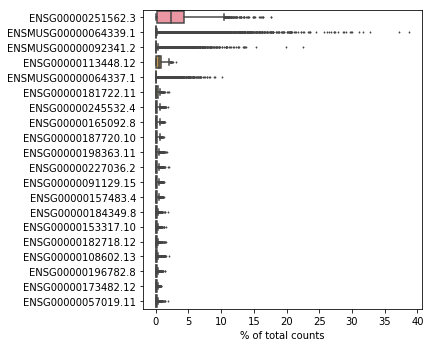

In [8]:
# Check to make sure scanpy plotting works on the AnnData object
sc.pl.highest_expr_genes(rna, n_top=20)

In [9]:
# Check to make sure filtering works on the AnnData object
sc.pp.filter_cells(rna, min_genes=1000)
rna

AnnData object with n_obs × n_vars = 4177 × 113153 
    obs: 'sample', 'cell_name', 'experiment', 'treatment_time', 'n_genes'
    var: 'gene_id', 'gene_type', 'gene_short_name'